# A Comparative Analysis of SGD Optimizers in Deep Learning Tasks

## Introduction
- SGD, being one of the most popular algorithms, plays an important role in optimization in machine learning. Having the characteristics of balancing the iteration and convergence rate, there are many advanced optimizers are developed based on the SGD.

- This project aims to find out the empirical performance by comparing different types of SGD optimizers, dissecting their operational mechanisms and assessing their empirical performance across a spectrum of deep learning challenges since the choice of the optimizer influences the machine learning models a lot.

## Problem Definition
- There are many optimizers built upon the class SGD, each with different attributes designed for specific scenarios. Given their various attributes, they should have different performances in different tasks.
- The objective of this project is to find out the capabilities of these algorithms and convergence performance in different deep-learning tasks by analyzing these optimizers under diverse conditions, and to find out their strengths and weaknesses in various deep-learning tasks.



## Methodology
- I will apply different SGD Optimizers to 6 types of deep learning tasks, each of them will be tested with normal layers and additional layers.
- The performance metrics will be focused on accuracy, including validation accuracy,and accuracy, will be put into comparison.
- The training pattern will also be studied, such as the turning point, and the epoch it takes to reach to 90% of the maximum accuracy, which can be a branch mark of the optimizer efficiency.

### Selected Deep learning tasks:
- - Classification tasks (Convolutional Neural Network (CNN)): the simplest model which can serve as a baseline for our comparison. <span style="color:blue">[1]</span>
- - Recurrent Neural Network (RNN) : for sequence data modeling such as time series or natural language. <span style="color:blue">[2]</span>
- - Image Captioning Model using a CNN and a Transformer: combined CNN and transformer, a complicated model to train. <span style="color:blue">[3]</span>
- - Timeseries classification on the FordA dataset from the UCR/UEA archive: a relatively simpler timeseries model  <span style="color:blue">[4]</span>

<span style="color:blue">[Please refer to the end of this document for the full citations corresponding to the numbered references.]</span>

**_All code utilized is sourced from open repositories stated above, with modifications limited to the optimizer and its parameters for the purpose of this study._

### Selected SGD Optimizers
- - SGD: the classic SGD optimizer, this will serve as the baseline for comparison.

- - SGD with Momentum: the gradient is combined with the velocity, it will accelerate gradient vectors in the right direction, leading to faster converging.

- - Nesterov Accelerated Gradient (NAG):  the gradient is combined with the look-ahead position's velocity. Nesterov momentum makes a more accurate
approximation of the gradient and adjust the parameters accordingly.

- - Adagrad: an adaptive learning rate optimization. 

- - RMSprop: it needs limited memory and is less prone to diminishing learning rates, making it more suitable for non-convex problems.

- - Adam: Adam combines RMSProp and Momentum, tending to be more popular and widely used due to its good performance in practice. 

### Parameters Set
- - The learning rate is set as same as default to 0.001 for all optimizers.
- - The momentum will be set as 0.99 for SGD with Momentum and Nesterov Accelerated Gradient (NAG).
- - For other parameters, the models will use the default values as well.

## Classification tasks (Convolutional Neural Network (CNN))

In [36]:
#import keras
from tensorflow import keras

import time
#this is for measuring the time for each epoch.
class TimeHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_start_time = time.time()

    def on_epoch_end(self, epoch, logs={}):
        self.times.append(time.time() - self.epoch_start_time)




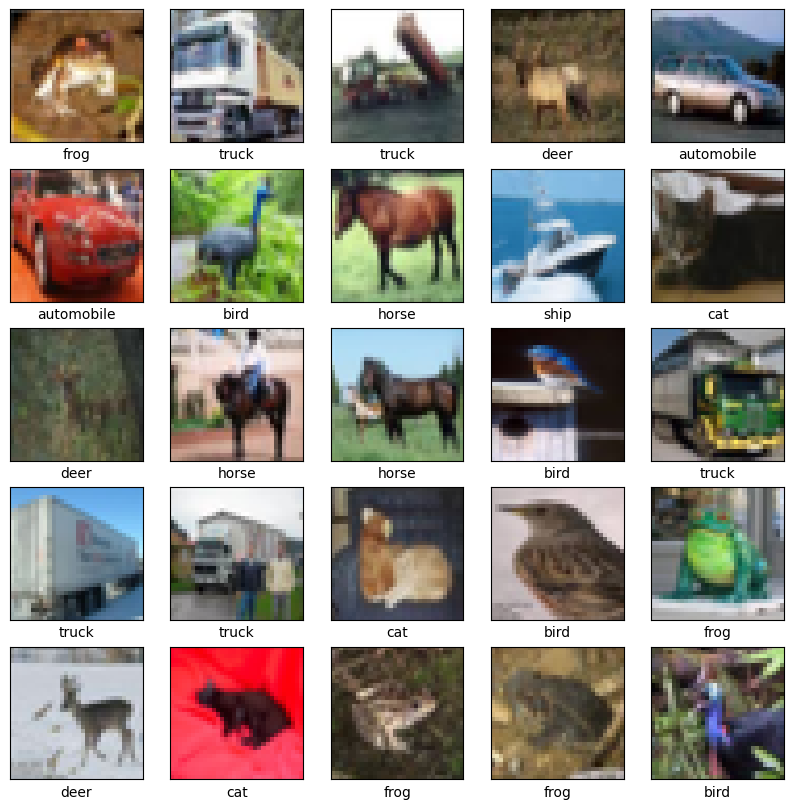

In [9]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()



In [10]:
#model with normal layers
model = models.Sequential()
model.add(layers.Input(shape=(32, 32, 3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.1512 - loss: 2.2651 - val_accuracy: 0.2818 - val_loss: 1.9610
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.3340 - loss: 1.8437 - val_accuracy: 0.4260 - val_loss: 1.5880
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.4420 - loss: 1.5464 - val_accuracy: 0.4899 - val_loss: 1.4148
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.4925 - loss: 1.4188 - val_accuracy: 0.4866 - val_loss: 1.4133
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5312 - loss: 1.3169 - val_accuracy: 0.5380 - val_loss: 1.2817
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.5639 - loss: 1.2417 - val_accuracy: 0.5689 - val_loss: 1.2192
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5903 - loss: 1.1691 - val_accuracy: 0.5759 - val_loss: 1.1952
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6067 - loss: 1

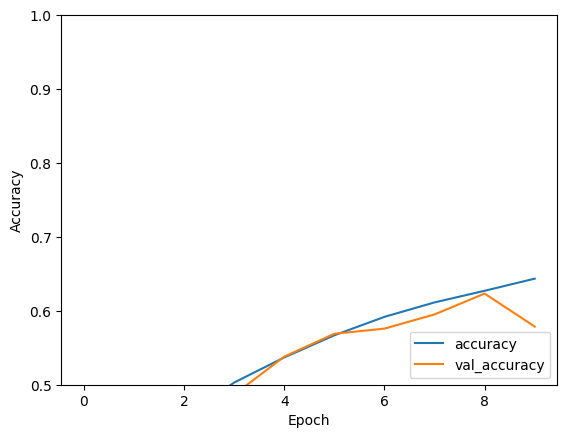

In [11]:
#SGD
model.compile(optimizer='SGD',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

time_callback = TimeHistory()
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels), callbacks=[time_callback])

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

epoch_times = time_callback.times
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1)
average_epoch_time = sum(time_callback.times) / len(time_callback.times)

print(f"Average epoch time: {average_epoch_time:.2f} seconds")

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.5661 - loss: 1.2299 - val_accuracy: 0.6022 - val_loss: 1.1239
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6433 - loss: 1.0172 - val_accuracy: 0.6550 - val_loss: 0.9939
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6875 - loss: 0.8932 - val_accuracy: 0.6608 - val_loss: 0.9745
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7172 - loss: 0.8073 - val_accuracy: 0.6829 - val_loss: 0.9193
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7507 - loss: 0.7137 - val_accuracy: 0.6902 - val_loss: 0.9144
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7649 - loss: 0.6640 - val_accuracy: 0.6791 - val_loss: 0.9690
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7864 - loss: 0.6064 - val_accuracy: 0.6560 - val_loss: 1.0581
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7985 - loss: 0

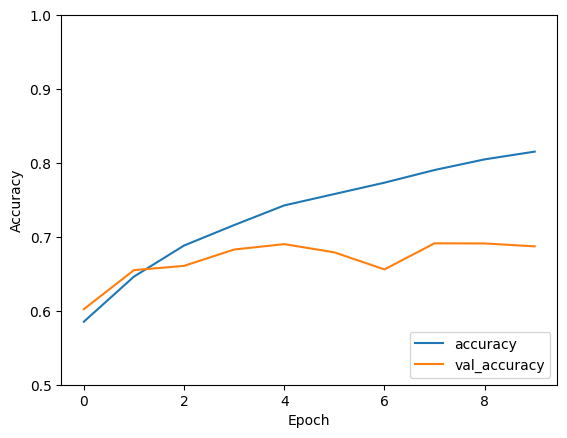

In [21]:
#SGD with Momentum

model.compile(optimizer=keras.optimizers.SGD(momentum=0.9),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

time_callback = TimeHistory()
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels), callbacks=[time_callback])

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

epoch_times = time_callback.times
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1)
average_epoch_time = sum(time_callback.times) / len(time_callback.times)

print(f"Average epoch time: {average_epoch_time:.2f} seconds")

## Experimental Results
- Present the results of your experiments.
- Use visualizations like graphs or charts to help convey your findings effectively. You can insert plots directly into the notebook cells.

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.3593 - loss: 1.7600 - val_accuracy: 0.5478 - val_loss: 1.2504
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.5628 - loss: 1.2226 - val_accuracy: 0.5741 - val_loss: 1.2057
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6433 - loss: 1.0154 - val_accuracy: 0.6531 - val_loss: 1.0060
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.6907 - loss: 0.8855 - val_accuracy: 0.6829 - val_loss: 0.9169
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7207 - loss: 0.8027 - val_accuracy: 0.6793 - val_loss: 0.9108
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7435 - loss: 0.7363 - val_accuracy: 0.6795 - val_loss: 0.9572
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.7629 - loss: 0.6658 - val_accuracy: 0.6855 - val_loss: 0.9402
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7869 - loss: 0

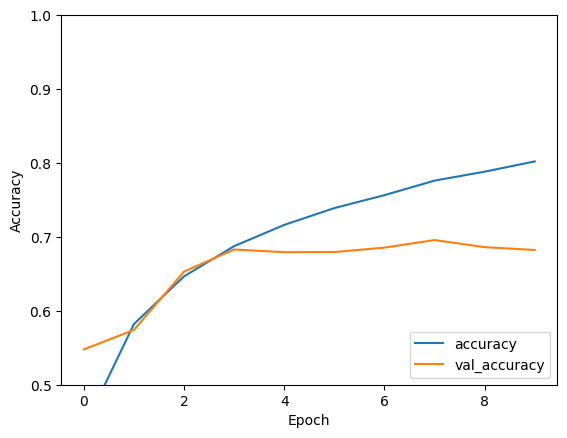

In [26]:
#Nesterov Accelerated Gradient (NAG)

model.compile(optimizer=keras.optimizers.SGD(momentum=0.9, nesterov=True),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

time_callback = TimeHistory()
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels), callbacks=[time_callback])

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

epoch_times = time_callback.times
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1)
average_epoch_time = sum(time_callback.times) / len(time_callback.times)

print(f"Average epoch time: {average_epoch_time:.2f} seconds")

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8587 - loss: 0.4051 - val_accuracy: 0.7197 - val_loss: 0.9307
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8896 - loss: 0.3210 - val_accuracy: 0.7201 - val_loss: 0.9375
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8972 - loss: 0.3058 - val_accuracy: 0.7228 - val_loss: 0.9425
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9009 - loss: 0.2943 - val_accuracy: 0.7229 - val_loss: 0.9475
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9084 - loss: 0.2798 - val_accuracy: 0.7257 - val_loss: 0.9514
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9090 - loss: 0.2756 - val_accuracy: 0.7266 - val_loss: 0.9563
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9125 - loss: 0.2652 - val_accuracy: 0.7268 - val_loss: 0.9593
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9147 - loss: 0

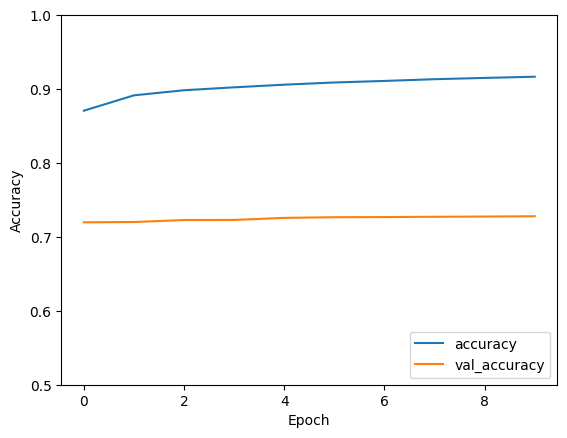

In [31]:
#Adagrad

model.compile(optimizer="Adagrad", 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

time_callback = TimeHistory()
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels), callbacks=[time_callback])

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

epoch_times = time_callback.times
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1)
average_epoch_time = sum(time_callback.times) / len(time_callback.times)

print(f"Average epoch time: {average_epoch_time:.2f} seconds")

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8660 - loss: 0.3788 - val_accuracy: 0.7092 - val_loss: 1.0513
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8881 - loss: 0.3233 - val_accuracy: 0.7186 - val_loss: 1.1590
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9015 - loss: 0.2837 - val_accuracy: 0.7113 - val_loss: 1.2249
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9164 - loss: 0.2420 - val_accuracy: 0.7135 - val_loss: 1.4123
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9269 - loss: 0.2107 - val_accuracy: 0.7063 - val_loss: 1.4413
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9336 - loss: 0.1931 - val_accuracy: 0.7062 - val_loss: 1.6277
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9421 - loss: 0.1711 - val_accuracy: 0.6991 - val_loss: 1.6982
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9456 - loss: 0

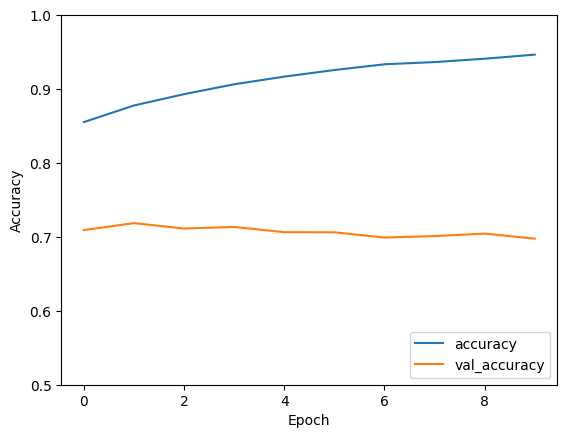

In [33]:
#RMSprop

model.compile(optimizer="RMSprop",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

time_callback = TimeHistory()
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels), callbacks=[time_callback])

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

epoch_times = time_callback.times
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1)
average_epoch_time = sum(time_callback.times) / len(time_callback.times)

print(f"Average epoch time: {average_epoch_time:.2f} seconds")

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9424 - loss: 0.1763 - val_accuracy: 0.6898 - val_loss: 1.8957
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9443 - loss: 0.1634 - val_accuracy: 0.6964 - val_loss: 2.0779
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9484 - loss: 0.1495 - val_accuracy: 0.6938 - val_loss: 1.9414
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9518 - loss: 0.1360 - val_accuracy: 0.6925 - val_loss: 2.0125
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9585 - loss: 0.1254 - val_accuracy: 0.6935 - val_loss: 2.0490
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9564 - loss: 0.1285 - val_accuracy: 0.6944 - val_loss: 2.0827
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9579 - loss: 0.1238 - val_accuracy: 0.6974 - val_loss: 2.1612
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9600 - loss: 0

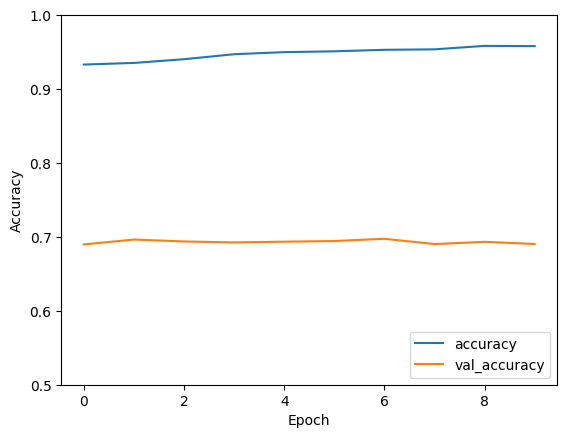

In [34]:
#Adam

model.compile(optimizer="Adam",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

time_callback = TimeHistory()
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels), callbacks=[time_callback])

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

epoch_times = time_callback.times
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1)
average_epoch_time = sum(time_callback.times) / len(time_callback.times)

print(f"Average epoch time: {average_epoch_time:.2f} seconds")

## Recurrent Neural Network (RNN) 

In [29]:
import tensorflow as tf

import numpy as np
import os
import time

In [30]:
path_to_file = tf.keras.utils.get_file('shakespeare.txt', 'https://storage.googleapis.com/download.tensorflow.org/data/shakespeare.txt')


In [31]:
# Read, then decode for py2 compat.
text = open(path_to_file, 'rb').read().decode(encoding='utf-8')
# length of text is the number of characters in it
print(f'Length of text: {len(text)} characters')

Length of text: 1115394 characters


In [32]:
# Take a look at the first 250 characters in text
print(text[:250])


First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You are all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you know Caius Marcius is chief enemy to the people.



In [33]:
# The unique characters in the file
vocab = sorted(set(text))
print(f'{len(vocab)} unique characters')

65 unique characters


In [34]:
example_texts = ['abcdefg', 'xyz']

chars = tf.strings.unicode_split(example_texts, input_encoding='UTF-8')
chars

<tf.RaggedTensor [[b'a', b'b', b'c', b'd', b'e', b'f', b'g'], [b'x', b'y', b'z']]>

In [35]:
ids_from_chars = tf.keras.layers.StringLookup(
    vocabulary=list(vocab), mask_token=None)

ids = ids_from_chars(chars)
ids

<tf.RaggedTensor [[40, 41, 42, 43, 44, 45, 46], [63, 64, 65]]>

In [36]:
chars_from_ids = tf.keras.layers.StringLookup(
    vocabulary=ids_from_chars.get_vocabulary(), invert=True, mask_token=None)
chars = chars_from_ids(ids)
chars


<tf.RaggedTensor [[b'a', b'b', b'c', b'd', b'e', b'f', b'g'], [b'x', b'y', b'z']]>

In [37]:
tf.strings.reduce_join(chars, axis=-1).numpy()

array([b'abcdefg', b'xyz'], dtype=object)

In [38]:
def text_from_ids(ids):
  return tf.strings.reduce_join(chars_from_ids(ids), axis=-1)

In [39]:
all_ids = ids_from_chars(tf.strings.unicode_split(text, 'UTF-8'))
all_ids

<tf.Tensor: shape=(1115394,), dtype=int64, numpy=array([19, 48, 57, ..., 46,  9,  1], dtype=int64)>

In [40]:
ids_dataset = tf.data.Dataset.from_tensor_slices(all_ids)


In [41]:
seq_length = 100

sequences = ids_dataset.batch(seq_length+1, drop_remainder=True)


In [42]:
for seq in sequences.take(5):
  print(text_from_ids(seq).numpy())

b'First Citizen:\nBefore we proceed any further, hear me speak.\n\nAll:\nSpeak, speak.\n\nFirst Citizen:\nYou '
b'are all resolved rather to die than to famish?\n\nAll:\nResolved. resolved.\n\nFirst Citizen:\nFirst, you k'
b"now Caius Marcius is chief enemy to the people.\n\nAll:\nWe know't, we know't.\n\nFirst Citizen:\nLet us ki"
b"ll him, and we'll have corn at our own price.\nIs't a verdict?\n\nAll:\nNo more talking on't; let it be d"
b'one: away, away!\n\nSecond Citizen:\nOne word, good citizens.\n\nFirst Citizen:\nWe are accounted poor citi'


In [43]:
def split_input_target(sequence):
    input_text = sequence[:-1]
    target_text = sequence[1:]
    return input_text, target_text

In [44]:
#split_input_target(list("Tensorflow"))

In [45]:
dataset = sequences.map(split_input_target)

In [46]:
for input_example, target_example in dataset.take(1):
    print("Input :", text_from_ids(input_example).numpy())
    print("Target:", text_from_ids(target_example).numpy())

Input : b'First Citizen:\nBefore we proceed any further, hear me speak.\n\nAll:\nSpeak, speak.\n\nFirst Citizen:\nYou'
Target: b'irst Citizen:\nBefore we proceed any further, hear me speak.\n\nAll:\nSpeak, speak.\n\nFirst Citizen:\nYou '


In [47]:
# Batch size
BATCH_SIZE = 64

# Buffer size to shuffle the dataset
# (TF data is designed to work with possibly infinite sequences,
# so it doesn't attempt to shuffle the entire sequence in memory. Instead,
# it maintains a buffer in which it shuffles elements).
BUFFER_SIZE = 10000

dataset = (
    dataset
    .shuffle(BUFFER_SIZE)
    .batch(BATCH_SIZE, drop_remainder=True)
    .prefetch(tf.data.experimental.AUTOTUNE))

dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(64, 100), dtype=tf.int64, name=None), TensorSpec(shape=(64, 100), dtype=tf.int64, name=None))>

In [48]:
# Length of the vocabulary in StringLookup Layer
vocab_size = len(ids_from_chars.get_vocabulary())

# The embedding dimension
embedding_dim = 256

# Number of RNN units
rnn_units = 1024

In [49]:
import tensorflow as tf

class MyModel(tf.keras.Model):
  def __init__(self, vocab_size, embedding_dim, rnn_units):
    super().__init__() 
    self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
    self.gru = tf.keras.layers.GRU(rnn_units,
                                   return_sequences=True,
                                   return_state=True)
    self.dense = tf.keras.layers.Dense(vocab_size)

  def call(self, inputs, states=None, return_state=False, training=False):
    x = self.embedding(inputs, training=training)

    x, states = self.gru(x, initial_state=states, training=training)
    x = self.dense(x, training=training)

    if return_state:
      return x, states
    else:
      return x

In [50]:
model = MyModel(
    vocab_size=vocab_size,
    embedding_dim=embedding_dim,
    rnn_units=rnn_units)

In [51]:
for input_example_batch, target_example_batch in dataset.take(1):
    example_batch_predictions = model(input_example_batch)
    print(example_batch_predictions.shape, "# (batch_size, sequence_length, vocab_size)")

(64, 100, 66) # (batch_size, sequence_length, vocab_size)


In [52]:
model.summary()

Model: "my_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)              │ ?                           │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru (GRU)                            │ ?                           │       3,938,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ ?                           │          67,650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,022,850 (15.35 MB)

 Trainable params: 4,022,850 (15.35 MB)

 Non-trainable params: 0 (0.00 B)

In [53]:
sampled_indices = tf.random.categorical(example_batch_predictions[0], num_samples=1)
sampled_indices = tf.squeeze(sampled_indices, axis=-1).numpy()

In [54]:
sampled_indices

array([62, 60, 25, 49, 20,  0, 13, 17, 25, 20,  8, 21,  7, 20, 51,  7,  3,
        5,  7, 49, 65, 22, 62, 48, 17, 48, 21, 54, 61, 53,  1, 27, 37, 61,
       41, 16,  8,  7, 62, 33, 44, 54, 63, 23, 15,  6,  1, 52, 39, 30,  5,
       23, 20, 48, 60, 56, 18, 46, 51, 35,  6, 26, 46, 18, 49, 32, 13, 26,
       50, 54, 65, 61, 50,  9, 31, 43, 56,  7, 25, 58, 60, 46, 38, 10, 27,
       50, 12, 12, 22, 23,  3, 28, 20, 26, 59, 51,  9,  2, 16, 24],
      dtype=int64)

In [55]:
loss = tf.losses.SparseCategoricalCrossentropy(from_logits=True)

In [56]:
example_batch_mean_loss = loss(target_example_batch, example_batch_predictions)

In [57]:
tf.exp(example_batch_mean_loss).numpy()

66.06329

In [58]:
#SGD

model.compile(optimizer='SGD', loss=loss, metrics=["accuracy"])
# Directory where the checkpoints will be saved
checkpoint_dir = './training_checkpoints'
# Name of the checkpoint files
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt_{epoch}.weights.h5")

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_prefix,
    save_weights_only=True)
EPOCHS = 15

DATASET_SIZE = len(list(dataset))
SPLIT_PERCENTAGE = 0.9  

# Calculate the number of batches to use for training based on the percentage
train_size = int(SPLIT_PERCENTAGE * DATASET_SIZE)

# Split the dataset
train_dataset = dataset.take(train_size)
validation_dataset = dataset.skip(train_size)

train_dataset = train_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

history = model.fit(train_dataset, epochs=EPOCHS, validation_data=validation_dataset)


Epoch 1/15
154/154 ━━━━━━━━━━━━━━━━━━━━ 165s 1s/step - accuracy: 0.1313 - loss: 4.1361 - val_accuracy: 0.1517 - val_loss: 3.9708
Epoch 2/15
154/154 ━━━━━━━━━━━━━━━━━━━━ 156s 1s/step - accuracy: 0.1525 - loss: 3.9073 - val_accuracy: 0.1529 - val_loss: 3.7077
Epoch 3/15
154/154 ━━━━━━━━━━━━━━━━━━━━ 153s 988ms/step - accuracy: 0.1526 - loss: 3.6457 - val_accuracy: 0.1520 - val_loss: 3.5014
Epoch 4/15
154/154 ━━━━━━━━━━━━━━━━━━━━ 148s 957ms/step - accuracy: 0.1520 - loss: 3.4674 - val_accuracy: 0.1525 - val_loss: 3.3936
Epoch 5/15
154/154 ━━━━━━━━━━━━━━━━━━━━ 149s 962ms/step - accuracy: 0.1525 - loss: 3.3841 - val_accuracy: 0.1523 - val_loss: 3.3506
Epoch 6/15
154/154 ━━━━━━━━━━━━━━━━━━━━ 148s 956ms/step - accuracy: 0.1523 - loss: 3.3548 - val_accuracy: 0.1524 - val_loss: 3.3389
Epoch 7/15
154/154 ━━━━━━━━━━━━━━━━━━━━ 148s 958ms/step - accuracy: 0.1524 - loss: 3.3404 - val_accuracy: 0.1519 - val_loss: 3.3316
Epoch 8/15
154/154 ━━━━━━━━━━━━━━━━━━━━ 151s 974ms/step - accuracy: 0.1526 - loss:

In [59]:
#SGD with Momentum
model.compile(optimizer=keras.optimizers.SGD(momentum=0.9), loss=loss, metrics=["accuracy"])
# Directory where the checkpoints will be saved
checkpoint_dir = './training_checkpoints'
# Name of the checkpoint files
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt_{epoch}.weights.h5")

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_prefix,
    save_weights_only=True)
EPOCHS = 15

DATASET_SIZE = len(list(dataset))
SPLIT_PERCENTAGE = 0.9  

# Calculate the number of batches to use for training based on the percentage
train_size = int(SPLIT_PERCENTAGE * DATASET_SIZE)

# Split the dataset
train_dataset = dataset.take(train_size)
validation_dataset = dataset.skip(train_size)

train_dataset = train_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

history = model.fit(train_dataset, epochs=EPOCHS, validation_data=validation_dataset)


Epoch 1/15
154/154 ━━━━━━━━━━━━━━━━━━━━ 164s 1s/step - accuracy: 0.1529 - loss: 3.2952 - val_accuracy: 0.1528 - val_loss: 3.2611
Epoch 2/15
154/154 ━━━━━━━━━━━━━━━━━━━━ 153s 989ms/step - accuracy: 0.1575 - loss: 3.2492 - val_accuracy: 0.1820 - val_loss: 3.2007
Epoch 3/15
154/154 ━━━━━━━━━━━━━━━━━━━━ 150s 968ms/step - accuracy: 0.1882 - loss: 3.1708 - val_accuracy: 0.2026 - val_loss: 3.0904
Epoch 4/15
154/154 ━━━━━━━━━━━━━━━━━━━━ 149s 965ms/step - accuracy: 0.2108 - loss: 3.0610 - val_accuracy: 0.2257 - val_loss: 2.9687
Epoch 5/15
154/154 ━━━━━━━━━━━━━━━━━━━━ 149s 962ms/step - accuracy: 0.2289 - loss: 2.9373 - val_accuracy: 0.2466 - val_loss: 2.8488
Epoch 6/15
154/154 ━━━━━━━━━━━━━━━━━━━━ 150s 967ms/step - accuracy: 0.2495 - loss: 2.8204 - val_accuracy: 0.2624 - val_loss: 2.7390
Epoch 7/15
154/154 ━━━━━━━━━━━━━━━━━━━━ 150s 967ms/step - accuracy: 0.2635 - loss: 2.7236 - val_accuracy: 0.2695 - val_loss: 2.6716
Epoch 8/15
154/154 ━━━━━━━━━━━━━━━━━━━━ 149s 961ms/step - accuracy: 0.2712 - lo

In [60]:
#Nesterov Accelerated Gradient (NAG)


model.compile(optimizer=keras.optimizers.SGD(momentum=0.9, nesterov=True), loss=loss, metrics=["accuracy"])
# Directory where the checkpoints will be saved
checkpoint_dir = './training_checkpoints'
# Name of the checkpoint files
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt_{epoch}.weights.h5")

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_prefix,
    save_weights_only=True)
EPOCHS = 15

DATASET_SIZE = len(list(dataset))
SPLIT_PERCENTAGE = 0.9  

# Calculate the number of batches to use for training based on the percentage
train_size = int(SPLIT_PERCENTAGE * DATASET_SIZE)

# Split the dataset
train_dataset = dataset.take(train_size)
validation_dataset = dataset.skip(train_size)

train_dataset = train_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

history = model.fit(train_dataset, epochs=EPOCHS, validation_data=validation_dataset)


Epoch 1/15
154/154 ━━━━━━━━━━━━━━━━━━━━ 151s 967ms/step - accuracy: 0.3123 - loss: 2.4124 - val_accuracy: 0.3151 - val_loss: 2.4054
Epoch 2/15
154/154 ━━━━━━━━━━━━━━━━━━━━ 149s 963ms/step - accuracy: 0.3183 - loss: 2.3956 - val_accuracy: 0.3209 - val_loss: 2.3917
Epoch 3/15
154/154 ━━━━━━━━━━━━━━━━━━━━ 150s 967ms/step - accuracy: 0.3218 - loss: 2.3810 - val_accuracy: 0.3262 - val_loss: 2.3671
Epoch 4/15
154/154 ━━━━━━━━━━━━━━━━━━━━ 149s 963ms/step - accuracy: 0.3265 - loss: 2.3676 - val_accuracy: 0.3297 - val_loss: 2.3527
Epoch 5/15
154/154 ━━━━━━━━━━━━━━━━━━━━ 150s 971ms/step - accuracy: 0.3310 - loss: 2.3539 - val_accuracy: 0.3236 - val_loss: 2.3648
Epoch 6/15
154/154 ━━━━━━━━━━━━━━━━━━━━ 150s 969ms/step - accuracy: 0.3315 - loss: 2.3422 - val_accuracy: 0.3360 - val_loss: 2.3318
Epoch 7/15
154/154 ━━━━━━━━━━━━━━━━━━━━ 150s 968ms/step - accuracy: 0.3357 - loss: 2.3271 - val_accuracy: 0.3373 - val_loss: 2.3166
Epoch 8/15
154/154 ━━━━━━━━━━━━━━━━━━━━ 150s 971ms/step - accuracy: 0.3384 -

In [61]:
#Adagrad

model.compile(optimizer="Adagrad",  loss=loss, metrics=["accuracy"])
# Directory where the checkpoints will be saved
checkpoint_dir = './training_checkpoints'
# Name of the checkpoint files
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt_{epoch}.weights.h5")

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_prefix,
    save_weights_only=True)
EPOCHS = 15

DATASET_SIZE = len(list(dataset))
SPLIT_PERCENTAGE = 0.9  

# Calculate the number of batches to use for training based on the percentage
train_size = int(SPLIT_PERCENTAGE * DATASET_SIZE)

# Split the dataset
train_dataset = dataset.take(train_size)
validation_dataset = dataset.skip(train_size)

train_dataset = train_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

history = model.fit(train_dataset, epochs=EPOCHS, validation_data=validation_dataset)


Epoch 1/15
154/154 ━━━━━━━━━━━━━━━━━━━━ 150s 964ms/step - accuracy: 0.3637 - loss: 2.2103 - val_accuracy: 0.3652 - val_loss: 2.2061
Epoch 2/15
154/154 ━━━━━━━━━━━━━━━━━━━━ 150s 971ms/step - accuracy: 0.3643 - loss: 2.2083 - val_accuracy: 0.3654 - val_loss: 2.2068
Epoch 3/15
154/154 ━━━━━━━━━━━━━━━━━━━━ 150s 968ms/step - accuracy: 0.3647 - loss: 2.2068 - val_accuracy: 0.3640 - val_loss: 2.2075
Epoch 4/15
154/154 ━━━━━━━━━━━━━━━━━━━━ 151s 974ms/step - accuracy: 0.3643 - loss: 2.2073 - val_accuracy: 0.3660 - val_loss: 2.2019
Epoch 5/15
154/154 ━━━━━━━━━━━━━━━━━━━━ 151s 974ms/step - accuracy: 0.3644 - loss: 2.2072 - val_accuracy: 0.3643 - val_loss: 2.2036
Epoch 6/15
154/154 ━━━━━━━━━━━━━━━━━━━━ 150s 972ms/step - accuracy: 0.3643 - loss: 2.2078 - val_accuracy: 0.3636 - val_loss: 2.2101
Epoch 7/15
154/154 ━━━━━━━━━━━━━━━━━━━━ 150s 971ms/step - accuracy: 0.3639 - loss: 2.2100 - val_accuracy: 0.3672 - val_loss: 2.2010
Epoch 8/15
154/154 ━━━━━━━━━━━━━━━━━━━━ 151s 973ms/step - accuracy: 0.3648 -

In [62]:
#RMSprop

model.compile(optimizer="RMSprop",  loss=loss, metrics=["accuracy"])
# Directory where the checkpoints will be saved
checkpoint_dir = './training_checkpoints'
# Name of the checkpoint files
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt_{epoch}.weights.h5")

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_prefix,
    save_weights_only=True)
EPOCHS = 15

DATASET_SIZE = len(list(dataset))
SPLIT_PERCENTAGE = 0.9  

# Calculate the number of batches to use for training based on the percentage
train_size = int(SPLIT_PERCENTAGE * DATASET_SIZE)

# Split the dataset
train_dataset = dataset.take(train_size)
validation_dataset = dataset.skip(train_size)

train_dataset = train_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

history = model.fit(train_dataset, epochs=EPOCHS, validation_data=validation_dataset)


Epoch 1/15
154/154 ━━━━━━━━━━━━━━━━━━━━ 152s 972ms/step - accuracy: 0.3059 - loss: 2.6959 - val_accuracy: 0.3699 - val_loss: 2.1495
Epoch 2/15
154/154 ━━━━━━━━━━━━━━━━━━━━ 151s 974ms/step - accuracy: 0.3800 - loss: 2.1191 - val_accuracy: 0.4025 - val_loss: 2.0148
Epoch 3/15
154/154 ━━━━━━━━━━━━━━━━━━━━ 150s 970ms/step - accuracy: 0.4144 - loss: 1.9807 - val_accuracy: 0.4382 - val_loss: 1.8959
Epoch 4/15
154/154 ━━━━━━━━━━━━━━━━━━━━ 150s 971ms/step - accuracy: 0.4471 - loss: 1.8657 - val_accuracy: 0.4678 - val_loss: 1.7779
Epoch 5/15
154/154 ━━━━━━━━━━━━━━━━━━━━ 151s 973ms/step - accuracy: 0.4764 - loss: 1.7630 - val_accuracy: 0.4961 - val_loss: 1.6929
Epoch 6/15
154/154 ━━━━━━━━━━━━━━━━━━━━ 150s 969ms/step - accuracy: 0.4978 - loss: 1.6796 - val_accuracy: 0.5144 - val_loss: 1.6167
Epoch 7/15
154/154 ━━━━━━━━━━━━━━━━━━━━ 150s 971ms/step - accuracy: 0.5172 - loss: 1.6086 - val_accuracy: 0.5311 - val_loss: 1.5543
Epoch 8/15
154/154 ━━━━━━━━━━━━━━━━━━━━ 150s 967ms/step - accuracy: 0.5317 -

In [63]:
#Adam

model.compile(optimizer='adam', loss=loss, metrics=["accuracy"])
# Directory where the checkpoints will be saved
checkpoint_dir = './training_checkpoints'
# Name of the checkpoint files
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt_{epoch}.weights.h5")

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_prefix,
    save_weights_only=True)
EPOCHS = 15

DATASET_SIZE = len(list(dataset))
SPLIT_PERCENTAGE = 0.9  

# Calculate the number of batches to use for training based on the percentage
train_size = int(SPLIT_PERCENTAGE * DATASET_SIZE)

# Split the dataset
train_dataset = dataset.take(train_size)
validation_dataset = dataset.skip(train_size)

train_dataset = train_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

history = model.fit(train_dataset, epochs=EPOCHS, validation_data=validation_dataset)


Epoch 1/15
154/154 ━━━━━━━━━━━━━━━━━━━━ 152s 972ms/step - accuracy: 0.5872 - loss: 1.3387 - val_accuracy: 0.6066 - val_loss: 1.2658
Epoch 2/15
154/154 ━━━━━━━━━━━━━━━━━━━━ 152s 980ms/step - accuracy: 0.6036 - loss: 1.2794 - val_accuracy: 0.6183 - val_loss: 1.2236
Epoch 3/15
154/154 ━━━━━━━━━━━━━━━━━━━━ 151s 973ms/step - accuracy: 0.6152 - loss: 1.2315 - val_accuracy: 0.6343 - val_loss: 1.1629
Epoch 4/15
154/154 ━━━━━━━━━━━━━━━━━━━━ 151s 976ms/step - accuracy: 0.6291 - loss: 1.1824 - val_accuracy: 0.6446 - val_loss: 1.1286
Epoch 5/15
154/154 ━━━━━━━━━━━━━━━━━━━━ 150s 972ms/step - accuracy: 0.6403 - loss: 1.1419 - val_accuracy: 0.6564 - val_loss: 1.0856
Epoch 6/15
154/154 ━━━━━━━━━━━━━━━━━━━━ 156s 1s/step - accuracy: 0.6542 - loss: 1.0924 - val_accuracy: 0.6764 - val_loss: 1.0265
Epoch 7/15
154/154 ━━━━━━━━━━━━━━━━━━━━ 152s 979ms/step - accuracy: 0.6706 - loss: 1.0407 - val_accuracy: 0.6948 - val_loss: 0.9694
Epoch 8/15
154/154 ━━━━━━━━━━━━━━━━━━━━ 151s 976ms/step - accuracy: 0.6858 - lo

## Image Captioning Model using a CNN and a Transformer

In [2]:
import os

os.environ["KERAS_BACKEND"] = "tensorflow"

import re
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras import layers
from keras.applications import efficientnet
from keras.layers import TextVectorization

keras.utils.set_random_seed(111)


!powershell -Command "Invoke-WebRequest -Uri 'https://github.com/jbrownlee/Datasets/releases/download/Flickr8k/Flickr8k_Dataset.zip' -OutFile 'Flickr8k_Dataset.zip'"
# Download the text data zip file
!powershell -Command "Invoke-WebRequest -Uri 'https://github.com/jbrownlee/Datasets/releases/download/Flickr8k/Flickr8k_text.zip' -OutFile 'Flickr8k_text.zip'"
# Extract the dataset zip file
!powershell -Command "Expand-Archive -Path 'Flickr8k_Dataset.zip' -DestinationPath '.' -Force"
# Extract the text data zip file
!powershell -Command "Expand-Archive -Path 'Flickr8k_text.zip' -DestinationPath '.' -Force"
# Remove the zip files
!powershell -Command "Remove-Item 'Flickr8k_Dataset.zip', 'Flickr8k_text.zip'"


^C


New-Object : Exception calling ".ctor" with "3" argument(s): "The process cannot access the file 'C:\Users\belly\Flickr
8k_Dataset.zip' because it is being used by another process."
At C:\Windows\system32\WindowsPowerShell\v1.0\Modules\Microsoft.PowerShell.Archive\Microsoft.PowerShell.Archive.psm1:93
1 char:30
+ ... ileStream = New-Object -TypeName System.IO.FileStream -ArgumentList $ ...
+                 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    + CategoryInfo          : InvalidOperation: (:) [New-Object], MethodInvocationException
    + FullyQualifiedErrorId : ConstructorInvokedThrowException,Microsoft.PowerShell.Commands.NewObjectCommand
 
Remove-Item : Cannot remove item C:\Users\belly\Flickr8k_Dataset.zip: The process cannot access the file 'C:\Users\bell
y\Flickr8k_Dataset.zip' because it is being used by another process.
At line:1 char:1
+ Remove-Item 'Flickr8k_Dataset.zip', 'Flickr8k_text.zip'
+ ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    + 

In [3]:

# Path to the images
IMAGES_PATH = "Flicker8k_Dataset"

# Desired image dimensions
IMAGE_SIZE = (299, 299)

# Vocabulary size
VOCAB_SIZE = 10000

# Fixed length allowed for any sequence
SEQ_LENGTH = 25

# Dimension for the image embeddings and token embeddings
EMBED_DIM = 512

# Per-layer units in the feed-forward network
FF_DIM = 512

# Other training parameters
BATCH_SIZE = 64
EPOCHS = 5
AUTOTUNE = tf.data.AUTOTUNE


In [4]:

def load_captions_data(filename):
    """Loads captions (text) data and maps them to corresponding images.

    Args:
        filename: Path to the text file containing caption data.

    Returns:
        caption_mapping: Dictionary mapping image names and the corresponding captions
        text_data: List containing all the available captions
    """

    with open(filename) as caption_file:
        caption_data = caption_file.readlines()
        caption_mapping = {}
        text_data = []
        images_to_skip = set()

        for line in caption_data:
            line = line.rstrip("\n")
            # Image name and captions are separated using a tab
            img_name, caption = line.split("\t")

            # Each image is repeated five times for the five different captions.
            # Each image name has a suffix `#(caption_number)`
            img_name = img_name.split("#")[0]
            img_name = os.path.join(IMAGES_PATH, img_name.strip())

            # We will remove caption that are either too short to too long
            tokens = caption.strip().split()

            if len(tokens) < 5 or len(tokens) > SEQ_LENGTH:
                images_to_skip.add(img_name)
                continue

            if img_name.endswith("jpg") and img_name not in images_to_skip:
                # We will add a start and an end token to each caption
                caption = "<start> " + caption.strip() + " <end>"
                text_data.append(caption)

                if img_name in caption_mapping:
                    caption_mapping[img_name].append(caption)
                else:
                    caption_mapping[img_name] = [caption]

        for img_name in images_to_skip:
            if img_name in caption_mapping:
                del caption_mapping[img_name]

        return caption_mapping, text_data


def train_val_split(caption_data, train_size=0.8, shuffle=True):
    """Split the captioning dataset into train and validation sets.

    Args:
        caption_data (dict): Dictionary containing the mapped caption data
        train_size (float): Fraction of all the full dataset to use as training data
        shuffle (bool): Whether to shuffle the dataset before splitting

    Returns:
        Traning and validation datasets as two separated dicts
    """

    # 1. Get the list of all image names
    all_images = list(caption_data.keys())

    # 2. Shuffle if necessary
    if shuffle:
        np.random.shuffle(all_images)

    # 3. Split into training and validation sets
    train_size = int(len(caption_data) * train_size)

    training_data = {
        img_name: caption_data[img_name] for img_name in all_images[:train_size]
    }
    validation_data = {
        img_name: caption_data[img_name] for img_name in all_images[train_size:]
    }

    # 4. Return the splits
    return training_data, validation_data


# Load the dataset
captions_mapping, text_data = load_captions_data("Flickr8k.token.txt")

# Split the dataset into training and validation sets
train_data, valid_data = train_val_split(captions_mapping)
print("Number of training samples: ", len(train_data))
print("Number of validation samples: ", len(valid_data))


def custom_standardization(input_string):
    lowercase = tf.strings.lower(input_string)
    return tf.strings.regex_replace(lowercase, "[%s]" % re.escape(strip_chars), "")


#strip_chars = "!\"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"
strip_chars = r"!\"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"
strip_chars = strip_chars.replace("<", "")
strip_chars = strip_chars.replace(">", "")

vectorization = TextVectorization(
    max_tokens=VOCAB_SIZE,
    output_mode="int",
    output_sequence_length=SEQ_LENGTH,
    standardize=custom_standardization,
)
vectorization.adapt(text_data)

# Data augmentation for image data
image_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.2),
        layers.RandomContrast(0.3),
    ]
)


Number of training samples:  6114
Number of validation samples:  1529


In [5]:
def decode_and_resize(img_path):
    img = tf.io.read_file(img_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, IMAGE_SIZE)
    img = tf.image.convert_image_dtype(img, tf.float32)
    return img


def process_input(img_path, captions):
    return decode_and_resize(img_path), vectorization(captions)


def make_dataset(images, captions):
    dataset = tf.data.Dataset.from_tensor_slices((images, captions))
    dataset = dataset.shuffle(BATCH_SIZE * 8)
    dataset = dataset.map(process_input, num_parallel_calls=AUTOTUNE)
    dataset = dataset.batch(BATCH_SIZE).prefetch(AUTOTUNE)

    return dataset


# Pass the list of images and the list of corresponding captions
train_dataset = make_dataset(list(train_data.keys()), list(train_data.values()))

valid_dataset = make_dataset(list(valid_data.keys()), list(valid_data.values()))

def get_cnn_model():
    base_model = efficientnet.EfficientNetB0(
        input_shape=(*IMAGE_SIZE, 3),
        include_top=False,
        weights="imagenet",
    )
    # We freeze our feature extractor
    base_model.trainable = False
    base_model_out = base_model.output
    base_model_out = layers.Reshape((-1, base_model_out.shape[-1]))(base_model_out)
    cnn_model = keras.models.Model(base_model.input, base_model_out)
    return cnn_model


class TransformerEncoderBlock(layers.Layer):
    def __init__(self, embed_dim, dense_dim, num_heads, **kwargs):
        super().__init__(**kwargs)
        self.embed_dim = embed_dim
        self.dense_dim = dense_dim
        self.num_heads = num_heads
        self.attention_1 = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=embed_dim, dropout=0.0
        )
        self.layernorm_1 = layers.LayerNormalization()
        self.layernorm_2 = layers.LayerNormalization()
        self.dense_1 = layers.Dense(embed_dim, activation="relu")

    def call(self, inputs, training, mask=None):
        inputs = self.layernorm_1(inputs)
        inputs = self.dense_1(inputs)

        attention_output_1 = self.attention_1(
            query=inputs,
            value=inputs,
            key=inputs,
            attention_mask=None,
            training=training,
        )
        out_1 = self.layernorm_2(inputs + attention_output_1)
        return out_1


class PositionalEmbedding(layers.Layer):
    def __init__(self, sequence_length, vocab_size, embed_dim, **kwargs):
        super().__init__(**kwargs)
        self.token_embeddings = layers.Embedding(
            input_dim=vocab_size, output_dim=embed_dim
        )
        self.position_embeddings = layers.Embedding(
            input_dim=sequence_length, output_dim=embed_dim
        )
        self.sequence_length = sequence_length
        self.vocab_size = vocab_size
        self.embed_dim = embed_dim
        self.embed_scale = tf.math.sqrt(tf.cast(embed_dim, tf.float32))

    def call(self, inputs):
        length = tf.shape(inputs)[-1]
        positions = tf.range(start=0, limit=length, delta=1)
        embedded_tokens = self.token_embeddings(inputs)
        embedded_tokens = embedded_tokens * self.embed_scale
        embedded_positions = self.position_embeddings(positions)
        return embedded_tokens + embedded_positions

    def compute_mask(self, inputs, mask=None):
        return tf.math.not_equal(inputs, 0)


class TransformerDecoderBlock(layers.Layer):
    def __init__(self, embed_dim, ff_dim, num_heads, **kwargs):
        super().__init__(**kwargs)
        self.embed_dim = embed_dim
        self.ff_dim = ff_dim
        self.num_heads = num_heads
        self.attention_1 = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=embed_dim, dropout=0.1
        )
        self.attention_2 = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=embed_dim, dropout=0.1
        )
        self.ffn_layer_1 = layers.Dense(ff_dim, activation="relu")
        self.ffn_layer_2 = layers.Dense(embed_dim)

        self.layernorm_1 = layers.LayerNormalization()
        self.layernorm_2 = layers.LayerNormalization()
        self.layernorm_3 = layers.LayerNormalization()

        self.embedding = PositionalEmbedding(
            embed_dim=EMBED_DIM,
            sequence_length=SEQ_LENGTH,
            vocab_size=VOCAB_SIZE,
        )
        self.out = layers.Dense(VOCAB_SIZE, activation="softmax")

        self.dropout_1 = layers.Dropout(0.3)
        self.dropout_2 = layers.Dropout(0.5)
        self.supports_masking = True

    def call(self, inputs, encoder_outputs, training, mask=None):
        inputs = self.embedding(inputs)
        causal_mask = self.get_causal_attention_mask(inputs)

        if mask is not None:
            padding_mask = tf.cast(mask[:, :, tf.newaxis], dtype=tf.int32)
            combined_mask = tf.cast(mask[:, tf.newaxis, :], dtype=tf.int32)
            combined_mask = tf.minimum(combined_mask, causal_mask)

        attention_output_1 = self.attention_1(
            query=inputs,
            value=inputs,
            key=inputs,
            attention_mask=combined_mask,
            training=training,
        )
        out_1 = self.layernorm_1(inputs + attention_output_1)

        attention_output_2 = self.attention_2(
            query=out_1,
            value=encoder_outputs,
            key=encoder_outputs,
            attention_mask=padding_mask,
            training=training,
        )
        out_2 = self.layernorm_2(out_1 + attention_output_2)

        ffn_out = self.ffn_layer_1(out_2)
        ffn_out = self.dropout_1(ffn_out, training=training)
        ffn_out = self.ffn_layer_2(ffn_out)

        ffn_out = self.layernorm_3(ffn_out + out_2, training=training)
        ffn_out = self.dropout_2(ffn_out, training=training)
        preds = self.out(ffn_out)
        return preds

    def get_causal_attention_mask(self, inputs):
        input_shape = tf.shape(inputs)
        batch_size, sequence_length = input_shape[0], input_shape[1]
        i = tf.range(sequence_length)[:, tf.newaxis]
        j = tf.range(sequence_length)
        mask = tf.cast(i >= j, dtype="int32")
        mask = tf.reshape(mask, (1, input_shape[1], input_shape[1]))
        mult = tf.concat(
            [
                tf.expand_dims(batch_size, -1),
                tf.constant([1, 1], dtype=tf.int32),
            ],
            axis=0,
        )
        return tf.tile(mask, mult)


class ImageCaptioningModel(keras.Model):
    def __init__(
        self,
        cnn_model,
        encoder,
        decoder,
        num_captions_per_image=5,
        image_aug=None,
    ):
        super().__init__()
        self.cnn_model = cnn_model
        self.encoder = encoder
        self.decoder = decoder
        self.loss_tracker = keras.metrics.Mean(name="loss")
        self.acc_tracker = keras.metrics.Mean(name="accuracy")
        self.num_captions_per_image = num_captions_per_image
        self.image_aug = image_aug

    def calculate_loss(self, y_true, y_pred, mask):
        loss = self.loss(y_true, y_pred)
        mask = tf.cast(mask, dtype=loss.dtype)
        loss *= mask
        return tf.reduce_sum(loss) / tf.reduce_sum(mask)

    def calculate_accuracy(self, y_true, y_pred, mask):
        accuracy = tf.equal(y_true, tf.argmax(y_pred, axis=2))
        accuracy = tf.math.logical_and(mask, accuracy)
        accuracy = tf.cast(accuracy, dtype=tf.float32)
        mask = tf.cast(mask, dtype=tf.float32)
        return tf.reduce_sum(accuracy) / tf.reduce_sum(mask)

    def _compute_caption_loss_and_acc(self, img_embed, batch_seq, training=True):
        encoder_out = self.encoder(img_embed, training=training)
        batch_seq_inp = batch_seq[:, :-1]
        batch_seq_true = batch_seq[:, 1:]
        mask = tf.math.not_equal(batch_seq_true, 0)
        batch_seq_pred = self.decoder(
            batch_seq_inp, encoder_out, training=training, mask=mask
        )
        loss = self.calculate_loss(batch_seq_true, batch_seq_pred, mask)
        acc = self.calculate_accuracy(batch_seq_true, batch_seq_pred, mask)
        return loss, acc

    def train_step(self, batch_data):
        batch_img, batch_seq = batch_data
        batch_loss = 0
        batch_acc = 0

        if self.image_aug:
            batch_img = self.image_aug(batch_img)

        # 1. Get image embeddings
        img_embed = self.cnn_model(batch_img)

        # 2. Pass each of the five captions one by one to the decoder
        # along with the encoder outputs and compute the loss as well as accuracy
        # for each caption.
        for i in range(self.num_captions_per_image):
            with tf.GradientTape() as tape:
                loss, acc = self._compute_caption_loss_and_acc(
                    img_embed, batch_seq[:, i, :], training=True
                )

                # 3. Update loss and accuracy
                batch_loss += loss
                batch_acc += acc

            # 4. Get the list of all the trainable weights
            train_vars = (
                self.encoder.trainable_variables + self.decoder.trainable_variables
            )

            # 5. Get the gradients
            grads = tape.gradient(loss, train_vars)

            # 6. Update the trainable weights
            self.optimizer.apply_gradients(zip(grads, train_vars))

        # 7. Update the trackers
        batch_acc /= float(self.num_captions_per_image)
        self.loss_tracker.update_state(batch_loss)
        self.acc_tracker.update_state(batch_acc)

        # 8. Return the loss and accuracy values
        return {
            "loss": self.loss_tracker.result(),
            "acc": self.acc_tracker.result(),
        }

    def test_step(self, batch_data):
        batch_img, batch_seq = batch_data
        batch_loss = 0
        batch_acc = 0

        # 1. Get image embeddings
        img_embed = self.cnn_model(batch_img)

        # 2. Pass each of the five captions one by one to the decoder
        # along with the encoder outputs and compute the loss as well as accuracy
        # for each caption.
        for i in range(self.num_captions_per_image):
            loss, acc = self._compute_caption_loss_and_acc(
                img_embed, batch_seq[:, i, :], training=False
            )

            # 3. Update batch loss and batch accuracy
            batch_loss += loss
            batch_acc += acc

        batch_acc /= float(self.num_captions_per_image)

        # 4. Update the trackers
        self.loss_tracker.update_state(batch_loss)
        self.acc_tracker.update_state(batch_acc)

        # 5. Return the loss and accuracy values
        return {
            "loss": self.loss_tracker.result(),
            "acc": self.acc_tracker.result(),
        }

    @property
    def metrics(self):
        # We need to list our metrics here so the `reset_states()` can be
        # called automatically.
        return [self.loss_tracker, self.acc_tracker]


cnn_model = get_cnn_model()
encoder = TransformerEncoderBlock(embed_dim=EMBED_DIM, dense_dim=FF_DIM, num_heads=1)
decoder = TransformerDecoderBlock(embed_dim=EMBED_DIM, ff_dim=FF_DIM, num_heads=2)
caption_model = ImageCaptioningModel(
    cnn_model=cnn_model,
    encoder=encoder,
    decoder=decoder,
    image_aug=image_augmentation,
)


In [6]:


# Define the loss function
cross_entropy = keras.losses.SparseCategoricalCrossentropy(
    from_logits=False,
    reduction=None,
)

# EarlyStopping criteria
early_stopping = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)


# Learning Rate Scheduler for the optimizer
class LRSchedule(keras.optimizers.schedules.LearningRateSchedule):
    def __init__(self, post_warmup_learning_rate, warmup_steps):
        super().__init__()
        self.post_warmup_learning_rate = post_warmup_learning_rate
        self.warmup_steps = warmup_steps

    def __call__(self, step):
        global_step = tf.cast(step, tf.float32)
        warmup_steps = tf.cast(self.warmup_steps, tf.float32)
        warmup_progress = global_step / warmup_steps
        warmup_learning_rate = self.post_warmup_learning_rate * warmup_progress
        return tf.cond(
            global_step < warmup_steps,
            lambda: warmup_learning_rate,
            lambda: self.post_warmup_learning_rate,
        )




In [7]:
#SGD

# Create a learning rate schedule
num_train_steps = len(train_dataset) * EPOCHS
num_warmup_steps = num_train_steps // 15
lr_schedule = LRSchedule(post_warmup_learning_rate=1e-4, warmup_steps=num_warmup_steps)

# Compile the model
#caption_model.compile(optimizer=keras.optimizers.Adam(lr_schedule), loss=cross_entropy)
caption_model.compile(optimizer="SGD", loss=cross_entropy)

# Fit the model
caption_model.fit(
    train_dataset,
    epochs=EPOCHS,
    validation_data=valid_dataset,
    callbacks=[early_stopping],
)

Epoch 1/5


C:\Users\belly\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\layer.py:845: UserWarning: Layer 'query' (of type EinsumDense) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(
C:\Users\belly\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\layer.py:845: UserWarning: Layer 'key' (of type EinsumDense) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(
C:\Users\belly\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\layer.py:845: UserWarning: Layer 'value' (of type EinsumDense) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. D

96/96 ━━━━━━━━━━━━━━━━━━━━ 736s 8s/step - acc: 0.1628 - loss: 35.5573 - accuracy: 0.2033 - val_accuracy: 0.2504 - val_loss: 25.8804
Epoch 2/5
96/96 ━━━━━━━━━━━━━━━━━━━━ 699s 7s/step - acc: 0.2482 - loss: 25.8650 - accuracy: 0.2534 - val_accuracy: 0.2713 - val_loss: 23.8432
Epoch 3/5
96/96 ━━━━━━━━━━━━━━━━━━━━ 698s 7s/step - acc: 0.2682 - loss: 24.0918 - accuracy: 0.2706 - val_accuracy: 0.2805 - val_loss: 22.7974
Epoch 4/5
96/96 ━━━━━━━━━━━━━━━━━━━━ 698s 7s/step - acc: 0.2774 - loss: 23.1498 - accuracy: 0.2788 - val_accuracy: 0.2859 - val_loss: 22.1396
Epoch 5/5
96/96 ━━━━━━━━━━━━━━━━━━━━ 698s 7s/step - acc: 0.2848 - loss: 22.5284 - accuracy: 0.2862 - val_accuracy: 0.2954 - val_loss: 21.6309


In [8]:
#SGD with Momentum

# Create a learning rate schedule
num_train_steps = len(train_dataset) * EPOCHS
num_warmup_steps = num_train_steps // 15
lr_schedule = LRSchedule(post_warmup_learning_rate=1e-4, warmup_steps=num_warmup_steps)

# Compile the model
#caption_model.compile(optimizer=keras.optimizers.Adam(lr_schedule), loss=cross_entropy)
caption_model.compile(optimizer=keras.optimizers.SGD(momentum=0.9), loss=cross_entropy)

# Fit the model
caption_model.fit(
    train_dataset,
    epochs=EPOCHS,
    validation_data=valid_dataset,
    callbacks=[early_stopping],
)

Epoch 1/5
96/96 ━━━━━━━━━━━━━━━━━━━━ 731s 7s/step - acc: 0.2960 - loss: 21.4995 - accuracy: 0.3025 - val_accuracy: 0.3185 - val_loss: 19.5368
Epoch 2/5
96/96 ━━━━━━━━━━━━━━━━━━━━ 710s 7s/step - acc: 0.3202 - loss: 19.6107 - accuracy: 0.3233 - val_accuracy: 0.3389 - val_loss: 18.4292
Epoch 3/5
96/96 ━━━━━━━━━━━━━━━━━━━━ 709s 7s/step - acc: 0.3348 - loss: 18.5862 - accuracy: 0.3364 - val_accuracy: 0.3483 - val_loss: 17.7618
Epoch 4/5
96/96 ━━━━━━━━━━━━━━━━━━━━ 710s 7s/step - acc: 0.3426 - loss: 17.9342 - accuracy: 0.3446 - val_accuracy: 0.3552 - val_loss: 17.3322
Epoch 5/5
96/96 ━━━━━━━━━━━━━━━━━━━━ 709s 7s/step - acc: 0.3504 - loss: 17.3980 - accuracy: 0.3516 - val_accuracy: 0.3567 - val_loss: 16.9556


In [12]:
#Nesterov Accelerated Gradient (NAG)

# Create a learning rate schedule
num_train_steps = len(train_dataset) * EPOCHS
num_warmup_steps = num_train_steps // 15
lr_schedule = LRSchedule(post_warmup_learning_rate=1e-4, warmup_steps=num_warmup_steps)

# Compile the model
#caption_model.compile(optimizer=keras.optimizers.Adam(lr_schedule), loss=cross_entropy)
caption_model.compile(optimizer=keras.optimizers.SGD(momentum=0.9, nesterov=True), loss=cross_entropy)

# Fit the model
caption_model.fit(
    train_dataset,
    epochs=EPOCHS,
    validation_data=valid_dataset,
    callbacks=[early_stopping],
)

Epoch 1/5
96/96 ━━━━━━━━━━━━━━━━━━━━ 746s 8s/step - acc: 0.3573 - loss: 16.9548 - accuracy: 0.3589 - val_accuracy: 0.3655 - val_loss: 16.6396
Epoch 2/5
96/96 ━━━━━━━━━━━━━━━━━━━━ 722s 8s/step - acc: 0.3630 - loss: 16.6390 - accuracy: 0.3643 - val_accuracy: 0.3713 - val_loss: 16.4291
Epoch 3/5
96/96 ━━━━━━━━━━━━━━━━━━━━ 722s 8s/step - acc: 0.3688 - loss: 16.2476 - accuracy: 0.3703 - val_accuracy: 0.3738 - val_loss: 16.1824
Epoch 4/5
96/96 ━━━━━━━━━━━━━━━━━━━━ 723s 8s/step - acc: 0.3745 - loss: 15.9385 - accuracy: 0.3758 - val_accuracy: 0.3812 - val_loss: 15.9584
Epoch 5/5
96/96 ━━━━━━━━━━━━━━━━━━━━ 721s 8s/step - acc: 0.3788 - loss: 15.7208 - accuracy: 0.3801 - val_accuracy: 0.3821 - val_loss: 15.8332


In [13]:
#Adagrad

# Create a learning rate schedule
num_train_steps = len(train_dataset) * EPOCHS
num_warmup_steps = num_train_steps // 15
lr_schedule = LRSchedule(post_warmup_learning_rate=1e-4, warmup_steps=num_warmup_steps)

# Compile the model
#caption_model.compile(optimizer=keras.optimizers.Adam(lr_schedule), loss=cross_entropy)
caption_model.compile(optimizer="Adagrad", loss=cross_entropy)

# Fit the model
caption_model.fit(
    train_dataset,
    epochs=EPOCHS,
    validation_data=valid_dataset,
    callbacks=[early_stopping],
)

Epoch 1/5
96/96 ━━━━━━━━━━━━━━━━━━━━ 750s 8s/step - acc: 0.3848 - loss: 15.3903 - accuracy: 0.3885 - val_accuracy: 0.3892 - val_loss: 15.6977
Epoch 2/5
96/96 ━━━━━━━━━━━━━━━━━━━━ 726s 8s/step - acc: 0.3885 - loss: 15.3150 - accuracy: 0.3915 - val_accuracy: 0.3901 - val_loss: 15.6710
Epoch 3/5
96/96 ━━━━━━━━━━━━━━━━━━━━ 726s 8s/step - acc: 0.3915 - loss: 15.2664 - accuracy: 0.3924 - val_accuracy: 0.3899 - val_loss: 15.6539
Epoch 4/5
96/96 ━━━━━━━━━━━━━━━━━━━━ 726s 8s/step - acc: 0.3895 - loss: 15.2672 - accuracy: 0.3923 - val_accuracy: 0.3905 - val_loss: 15.6532
Epoch 5/5
96/96 ━━━━━━━━━━━━━━━━━━━━ 725s 8s/step - acc: 0.3929 - loss: 15.2164 - accuracy: 0.3937 - val_accuracy: 0.3907 - val_loss: 15.6427


In [7]:
#RMSprop

# Create a learning rate schedule
num_train_steps = len(train_dataset) * EPOCHS
num_warmup_steps = num_train_steps // 15
lr_schedule = LRSchedule(post_warmup_learning_rate=1e-4, warmup_steps=num_warmup_steps)

# Compile the model
#caption_model.compile(optimizer=keras.optimizers.Adam(lr_schedule), loss=cross_entropy)
caption_model.compile(optimizer="RMSprop", loss=cross_entropy)

# Fit the model
caption_model.fit(
    train_dataset,
    epochs=EPOCHS,
    validation_data=valid_dataset,
    callbacks=[early_stopping],
)

Epoch 1/5


C:\Users\belly\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\layer.py:845: UserWarning: Layer 'query' (of type EinsumDense) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(
C:\Users\belly\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\layer.py:845: UserWarning: Layer 'key' (of type EinsumDense) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(
C:\Users\belly\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\layer.py:845: UserWarning: Layer 'value' (of type EinsumDense) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. D

96/96 ━━━━━━━━━━━━━━━━━━━━ 785s 8s/step - acc: 0.2789 - loss: 22.3807 - accuracy: 0.3247 - val_accuracy: 0.3410 - val_loss: 17.4131
Epoch 2/5
96/96 ━━━━━━━━━━━━━━━━━━━━ 747s 8s/step - acc: 0.3769 - loss: 16.6271 - accuracy: 0.3824 - val_accuracy: 0.3718 - val_loss: 16.4535
Epoch 3/5
96/96 ━━━━━━━━━━━━━━━━━━━━ 726s 8s/step - acc: 0.3991 - loss: 15.5489 - accuracy: 0.4013 - val_accuracy: 0.3745 - val_loss: 16.2771
Epoch 4/5
96/96 ━━━━━━━━━━━━━━━━━━━━ 727s 8s/step - acc: 0.4108 - loss: 15.0007 - accuracy: 0.4127 - val_accuracy: 0.3804 - val_loss: 16.0667
Epoch 5/5
96/96 ━━━━━━━━━━━━━━━━━━━━ 727s 8s/step - acc: 0.4211 - loss: 14.5583 - accuracy: 0.4230 - val_accuracy: 0.3851 - val_loss: 15.9918


In [11]:
#Adam

# Create a learning rate schedule
num_train_steps = len(train_dataset) * EPOCHS
num_warmup_steps = num_train_steps // 15
lr_schedule = LRSchedule(post_warmup_learning_rate=1e-4, warmup_steps=num_warmup_steps)

# Compile the model
#caption_model.compile(optimizer=keras.optimizers.Adam(lr_schedule), loss=cross_entropy)
caption_model.compile(optimizer="Adam", loss=cross_entropy)

# Fit the model
caption_model.fit(
    train_dataset,
    epochs=EPOCHS,
    validation_data=valid_dataset,
    callbacks=[early_stopping],
)

Epoch 1/5
96/96 ━━━━━━━━━━━━━━━━━━━━ 771s 8s/step - acc: 0.4429 - loss: 13.7416 - accuracy: 0.4433 - val_accuracy: 0.3953 - val_loss: 15.8496
Epoch 2/5
96/96 ━━━━━━━━━━━━━━━━━━━━ 746s 8s/step - acc: 0.4499 - loss: 13.0847 - accuracy: 0.4517 - val_accuracy: 0.3957 - val_loss: 15.8361
Epoch 3/5
96/96 ━━━━━━━━━━━━━━━━━━━━ 792s 8s/step - acc: 0.4569 - loss: 12.5381 - accuracy: 0.4584 - val_accuracy: 0.3914 - val_loss: 16.1431


## Timeseries classification on the FordA dataset from the UCR/UEA archive


In [16]:
import keras
import numpy as np
import matplotlib.pyplot as plt

def readucr(filename):
    data = np.loadtxt(filename, delimiter="\t")
    y = data[:, 0]
    x = data[:, 1:]
    return x, y.astype(int)


root_url = "https://raw.githubusercontent.com/hfawaz/cd-diagram/master/FordA/"

x_train, y_train = readucr(root_url + "FordA_TRAIN.tsv")
x_test, y_test = readucr(root_url + "FordA_TEST.tsv")


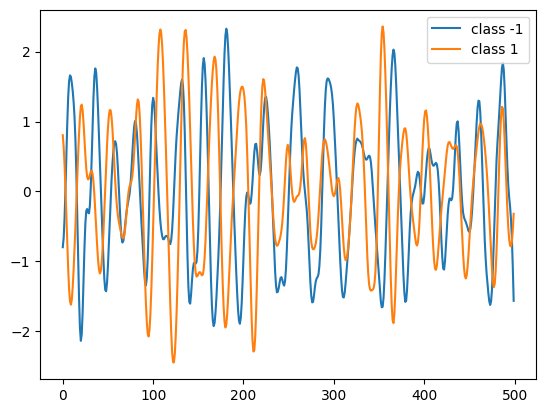

In [17]:

classes = np.unique(np.concatenate((y_train, y_test), axis=0))

plt.figure()
for c in classes:
    c_x_train = x_train[y_train == c]
    plt.plot(c_x_train[0], label="class " + str(c))
plt.legend(loc="best")
plt.show()
plt.close()


In [18]:

x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

num_classes = len(np.unique(y_train))

idx = np.random.permutation(len(x_train))
x_train = x_train[idx]
y_train = y_train[idx]

y_train[y_train == -1] = 0
y_test[y_test == -1] = 0


In [19]:


def make_model(input_shape):
    input_layer = keras.layers.Input(input_shape)

    conv1 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(input_layer)
    conv1 = keras.layers.BatchNormalization()(conv1)
    conv1 = keras.layers.ReLU()(conv1)

    conv2 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv1)
    conv2 = keras.layers.BatchNormalization()(conv2)
    conv2 = keras.layers.ReLU()(conv2)

    conv3 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv2)
    conv3 = keras.layers.BatchNormalization()(conv3)
    conv3 = keras.layers.ReLU()(conv3)

    gap = keras.layers.GlobalAveragePooling1D()(conv3)

    output_layer = keras.layers.Dense(num_classes, activation="softmax")(gap)

    return keras.models.Model(inputs=input_layer, outputs=output_layer)


model = make_model(input_shape=x_train.shape[1:])
keras.utils.plot_model(model, show_shapes=True)


You must install pydot (`pip install pydot`) for `plot_model` to work.


In [20]:
#SGD
epochs = 50
batch_size = 32

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.keras", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]
model.compile(
    optimizer="SGD",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)
history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.2,
    verbose=1,
)

Epoch 1/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 0.6714 - sparse_categorical_accuracy: 0.5337 - val_loss: 0.7091 - val_sparse_categorical_accuracy: 0.4702 - learning_rate: 0.0100
Epoch 2/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 0.6244 - sparse_categorical_accuracy: 0.6417 - val_loss: 0.7474 - val_sparse_categorical_accuracy: 0.4702 - learning_rate: 0.0100
Epoch 3/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 0.5921 - sparse_categorical_accuracy: 0.6993 - val_loss: 0.7528 - val_sparse_categorical_accuracy: 0.4702 - learning_rate: 0.0100
Epoch 4/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.5697 - sparse_categorical_accuracy: 0.7240 - val_loss: 0.6730 - val_sparse_categorical_accuracy: 0.5798 - learning_rate: 0.0100
Epoch 5/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 0.5480 - sparse_categorical_accuracy: 0.7324 - val_loss: 0.5944 - val_sparse_categorical_accuracy: 0.7060 - learning_rate: 0.0100
Epoch 6/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - lo

In [21]:
#SGD with Momentum
epochs = 50
batch_size = 32

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.keras", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]
model.compile(
    optimizer=keras.optimizers.SGD(momentum=0.9),
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)
history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.2,
    verbose=1,
)

Epoch 1/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.4319 - sparse_categorical_accuracy: 0.7937 - val_loss: 1.9709 - val_sparse_categorical_accuracy: 0.5312 - learning_rate: 0.0100
Epoch 2/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 0.4249 - sparse_categorical_accuracy: 0.7936 - val_loss: 3.0731 - val_sparse_categorical_accuracy: 0.5298 - learning_rate: 0.0100
Epoch 3/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 0.4476 - sparse_categorical_accuracy: 0.7731 - val_loss: 0.4682 - val_sparse_categorical_accuracy: 0.7393 - learning_rate: 0.0100
Epoch 4/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 0.4194 - sparse_categorical_accuracy: 0.7872 - val_loss: 0.6079 - val_sparse_categorical_accuracy: 0.7087 - learning_rate: 0.0100
Epoch 5/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 0.4131 - sparse_categorical_accuracy: 0.7931 - val_loss: 0.4520 - val_sparse_categorical_accuracy: 0.7878 - learning_rate: 0.0100
Epoch 6/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - lo

In [22]:
#Nesterov Accelerated Gradient (NAG)
epochs = 50
batch_size = 32

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.keras", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]
model.compile(
    optimizer=keras.optimizers.SGD(momentum=0.9, nesterov=True),
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)
history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.2,
    verbose=1,
)

Epoch 1/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 0.2472 - sparse_categorical_accuracy: 0.8969 - val_loss: 0.3021 - val_sparse_categorical_accuracy: 0.8571 - learning_rate: 0.0100
Epoch 2/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 0.2469 - sparse_categorical_accuracy: 0.8947 - val_loss: 0.2874 - val_sparse_categorical_accuracy: 0.8669 - learning_rate: 0.0100
Epoch 3/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 0.2457 - sparse_categorical_accuracy: 0.8960 - val_loss: 0.2845 - val_sparse_categorical_accuracy: 0.8655 - learning_rate: 0.0100
Epoch 4/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 0.2447 - sparse_categorical_accuracy: 0.8970 - val_loss: 0.3071 - val_sparse_categorical_accuracy: 0.8544 - learning_rate: 0.0100
Epoch 5/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.2433 - sparse_categorical_accuracy: 0.8977 - val_loss: 0.3219 - val_sparse_categorical_accuracy: 0.8363 - learning_rate: 0.0100
Epoch 6/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - lo

In [23]:
#Adagrad
epochs = 50
batch_size = 32

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.keras", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]
model.compile(
    optimizer="Adagrad",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)
history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.2,
    verbose=1,
)

Epoch 1/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.2147 - sparse_categorical_accuracy: 0.9054 - val_loss: 0.2373 - val_sparse_categorical_accuracy: 0.8877 - learning_rate: 0.0010
Epoch 2/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.2071 - sparse_categorical_accuracy: 0.9126 - val_loss: 0.2209 - val_sparse_categorical_accuracy: 0.9057 - learning_rate: 0.0010
Epoch 3/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 0.2045 - sparse_categorical_accuracy: 0.9155 - val_loss: 0.2175 - val_sparse_categorical_accuracy: 0.9140 - learning_rate: 0.0010
Epoch 4/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 0.2035 - sparse_categorical_accuracy: 0.9156 - val_loss: 0.2165 - val_sparse_categorical_accuracy: 0.9085 - learning_rate: 0.0010
Epoch 5/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.2029 - sparse_categorical_accuracy: 0.9172 - val_loss: 0.2160 - val_sparse_categorical_accuracy: 0.9085 - learning_rate: 0.0010
Epoch 6/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - lo

In [24]:
#RMSprop
epochs = 50
batch_size = 32

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.keras", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]
model.compile(
    optimizer="RMSprop",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)
history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.2,
    verbose=1,
)

Epoch 1/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.2455 - sparse_categorical_accuracy: 0.8903 - val_loss: 0.2483 - val_sparse_categorical_accuracy: 0.8918 - learning_rate: 0.0010
Epoch 2/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.2256 - sparse_categorical_accuracy: 0.9040 - val_loss: 0.2486 - val_sparse_categorical_accuracy: 0.8890 - learning_rate: 0.0010
Epoch 3/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.2241 - sparse_categorical_accuracy: 0.9053 - val_loss: 0.2722 - val_sparse_categorical_accuracy: 0.8696 - learning_rate: 0.0010
Epoch 4/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.2228 - sparse_categorical_accuracy: 0.9064 - val_loss: 0.2730 - val_sparse_categorical_accuracy: 0.8710 - learning_rate: 0.0010
Epoch 5/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.2213 - sparse_categorical_accuracy: 0.9075 - val_loss: 0.2750 - val_sparse_categorical_accuracy: 0.8696 - learning_rate: 0.0010
Epoch 6/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - lo

In [25]:
#Adam
epochs = 50
batch_size = 32

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.keras", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)
history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.2,
    verbose=1,
)

Epoch 1/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.1498 - sparse_categorical_accuracy: 0.9423 - val_loss: 0.1480 - val_sparse_categorical_accuracy: 0.9487 - learning_rate: 0.0010
Epoch 2/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.1326 - sparse_categorical_accuracy: 0.9508 - val_loss: 0.1439 - val_sparse_categorical_accuracy: 0.9473 - learning_rate: 0.0010
Epoch 3/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.1265 - sparse_categorical_accuracy: 0.9519 - val_loss: 0.1546 - val_sparse_categorical_accuracy: 0.9390 - learning_rate: 0.0010
Epoch 4/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.1197 - sparse_categorical_accuracy: 0.9570 - val_loss: 0.1859 - val_sparse_categorical_accuracy: 0.9223 - learning_rate: 0.0010
Epoch 5/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 0.1186 - sparse_categorical_accuracy: 0.9586 - val_loss: 0.2273 - val_sparse_categorical_accuracy: 0.9001 - learning_rate: 0.0010
Epoch 6/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - lo

## Analysis

### Comparison table of all the results


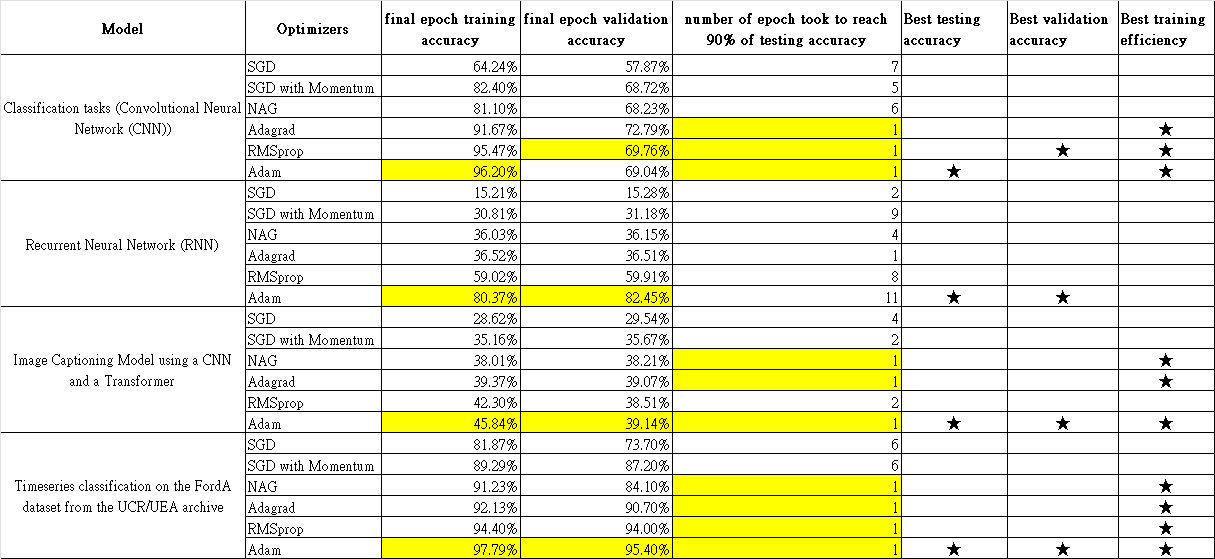

## Optimizer Performance in the experiments

### Classification tasks (Convolutional Neural Network (CNN))
In the CNN experiments, Adagrad, RMSprop, Adam all achieved good scores with training accuracies exceeding 91% and validation accuracies above 69%.  Among them, Adam achieved the highest training accuracy at at 96.2%; while RMSprop achieved the highest validation accuracy at 69.76%, while Adam is also doing good by reaching the score of  69.76%.
In term of training efficiency, all Adagrad, RMSprop, Adam can reach 90% of the final epoch training accuracy at the 1st  epoch, indicating high training efficiency.


### Recurrent Neural Network (RNN)
In Recurrent Neural Network (RNN), Adam has the best performance in both training accuracy and validation accuracy, recording scores of 80.37% and 82.45% respectively. However, it takes 11 epochs to achieve 90% of its final epoch training accuracy. 

In contrast, the SGD, SGD with Momentum, NAG, and Adagrad have both training accuracy and validation accuracy significantly lower (below 40%), and ceased improving after the 2nd epoch. All of them perform significantly poorer than Adam even though it takes fewer epochs to improve. Therefore, no best training efficiency optimizer is selected for this model given the poor accuracy. 

It is worth mentioning that the scores vary a lot in these optimizers, ranging from 15% to 80%. SGD not only has the lowest score but has stopped improving since epoch 2.  One possible reason is that Adam handles vanishing gradients better than other optimizers, so it excels in RNN since RNNs are particularly susceptible to the problem of vanishing gradients.

### Image Captioning Model using a CNN and a Transformer
In the Image Captioning Model using a CNN and a Transformer, which integrates a CNN with a Transformer, it is a relatively complicated model. Due to the limitation of the resources, I can only perform 5 epochs for each model even though the scores should go up along with more epochs.

Adam again has both the best performance in training accuracy at 45.84%, and in validation accuracy at 39.14%.
It is worth noting that NAG, Adagrad and Adam all reach 90% of the final epoch training accuracy at the 1# epoch.

### Timeseries classification on the FordA dataset from the UCR/UEA archive
In Timeseries classification on the FordA dataset from the UCR/UEA archive, again Adam has the best performance in both training accuracy and validation accuracy, achieving  97.79% and 95.4% respectively.
In term of training efficiency, all NAG, Adagrad, RMSprop, Adam can reach 90% of the final epoch training accuracy at the 1st epoch.
It is worth noting that all optimizers have relatively good results, ranging  from 81.87% to 97.79% for training accuracy, suggesting this the model was relatively straightforward to train.


## Robustness in generalizing the models

Below is a summary table featuring both the total final epoch training accuracy and the total final epoch validation accuracy for each model. 
The last column displays the Average percentage of validation accuracy relative to training accuracy, which serves as an indicator of each optimizer's ability to generalize the model to unseen data.
If the validation accuracy is close to training accuracy, it suggests that the model is not likely to suffer from overfitting issues.

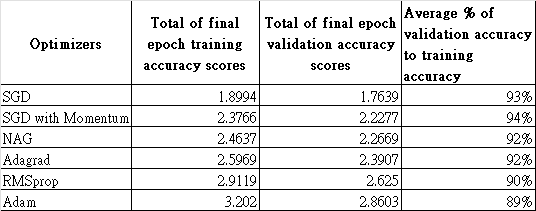


Among them, SGD with Momentum has the highest score with 94%, and following the SGD with 93%.
What we can see is all the optimizers have a very good score, suggesting all of them are not likely to have an overfitting problem.

## Conclusion
- Adam is the best optimizer to use in all training tasks, with robust performance in terms of both training accuracy and validation accuracy, it also maintains a high training speed in which it requires a fewer equates to reach convergence compared to other optimizers. Moreover, it has particular good performance in Recurrent Neural Network (RNN) which is particularly susceptible to the problem of vanishing gradients.
As a result, Adam should be the primary choice of optimizer in similar machine learning tasks.
  
- The analysis was constrained by available computational resources and dataset, the scope of models and the number of epochs we could evaluate are limited.If we can have a more robust computer and more dataset, we could potentially find more details about the characteristics of different optimizers. Therefore, this result should be regarded as preliminary insight providing initial choices in optimizer selection.


## References
- Convolutional Neural Network (CNN). TensorFlow Core, TensorFlow, 2024, www.tensorflow.org/tutorials/images/cnn. [1]
- Zhu, Scott, and Francois Chollet. "Working with RNNs." TensorFlow Core, TensorFlow, https://www.tensorflow.org/guide/keras/working_with_rnns. Accessed 7 April 2024. [2]
- Nain, A. K. "Image Captioning." https://keras.io/examples/vision/image_captioning/ last modified 31 Oct 2021,  Accessed 7 April 2024. [3]
- hfawaz, "Timeseries classification from scratch". https://keras.io/examples/timeseries/timeseries_classification_from_scratch/last modified 10 Nov 2023,  Accessed 7 April 2024. [4]


**_All code utilized is sourced from open repositories stated above, with modifications limited to the optimizer and its parameters for the purpose of this study._